In [33]:
import matplotlib.pyplot as plt
import numpy as np


file_path = './Play Store Data.csv'
all_data = []

# Reading all lines in the file
with open(file_path, 'r') as file:
    for line in file:
        all_data.append(line.strip().split(','))



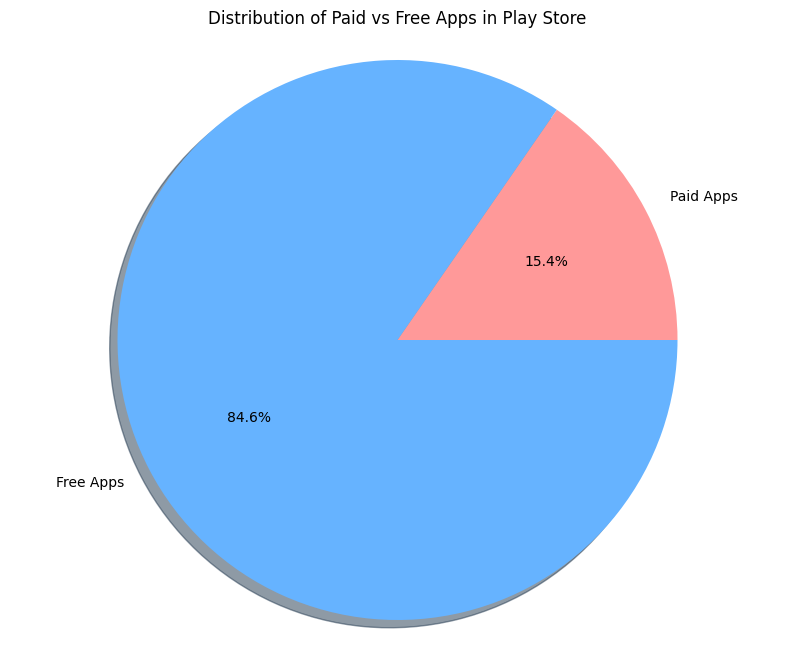


Estadísticas:
Apps pagas: 274
Apps gratuitas: 1509
Total apps: 1783


In [34]:
# Saltamos la primera línea (headers)
headers = all_data[0]
data = all_data[1:]

# Contamos apps pagas y gratuitas
# Type está en el índice 6
paid_apps = 0
free_apps = 0

for row in data:
    if len(row) > 6:  # Nos aseguramos que la fila tenga suficientes columnas
        if row[6] == 'Free':
            free_apps += 1
        elif row[6] == 'Paid':
            paid_apps += 1

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie([paid_apps, free_apps], 
        labels=['Paid Apps', 'Free Apps'],
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'],
        shadow=True)

plt.title('Distribution of Paid vs Free Apps in Play Store')
plt.axis('equal')  # Para asegurar que el círculo sea redondo
plt.show()

# Imprimir estadísticas
print(f"\nEstadísticas:")
print(f"Apps pagas: {paid_apps}")
print(f"Apps gratuitas: {free_apps}")
print(f"Total apps: {paid_apps + free_apps}")

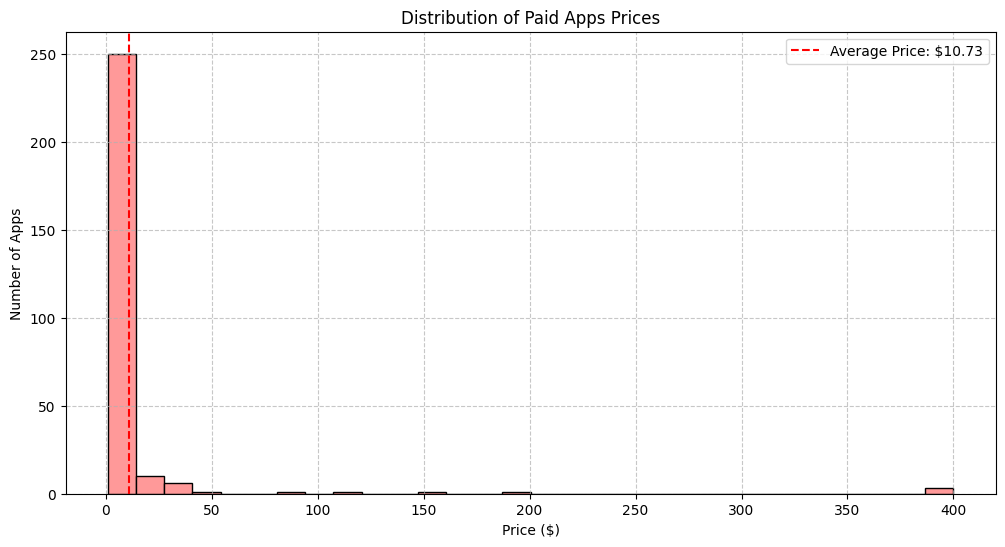


Estadísticas de Precios:
Precio promedio: $10.73
Precio máximo: $399.99
Precio mínimo: $0.99
Número total de apps pagas: 274


In [35]:
# Lista para almacenar los precios
prices = []

# Recolectamos los precios de las apps pagas
for row in data:
    if len(row) > 7:  # Aseguramos que la fila tenga suficientes columnas
        if row[6] == 'Paid':  # Si es una app paga
            price = float(row[7].replace('$', ''))  # Convertimos el precio a float
            prices.append(price)

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(prices, bins=30, color='#ff9999', edgecolor='black')
plt.title('Distribution of Paid Apps Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar línea vertical con el precio promedio
average_price = sum(prices) / len(prices)
plt.axvline(x=average_price, color='red', linestyle='--', label=f'Average Price: ${average_price:.2f}')
plt.legend()

plt.show()

# Imprimir estadísticas de precios
print(f"\nEstadísticas de Precios:")
print(f"Precio promedio: ${average_price:.2f}")
print(f"Precio máximo: ${max(prices):.2f}")
print(f"Precio mínimo: ${min(prices):.2f}")
print(f"Número total de apps pagas: {len(prices)}")


Estadísticas de Ratings:
Apps Pagas:
- Rating promedio: 4.22
- Número de apps pagas con rating: 130
- Rating máximo: 5.00
- Rating mínimo: 1.00

Apps Gratuitas:
- Rating promedio: 4.37
- Número de apps gratuitas con rating: 503
- Rating máximo: 5.00
- Rating mínimo: 1.00


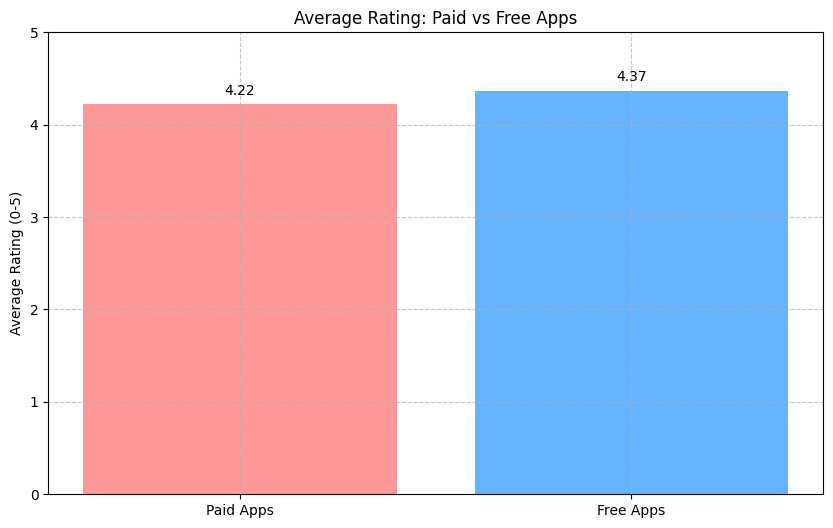

/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/3331311778.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([paid_ratings, free_ratings], labels=['Paid Apps', 'Free Apps'])


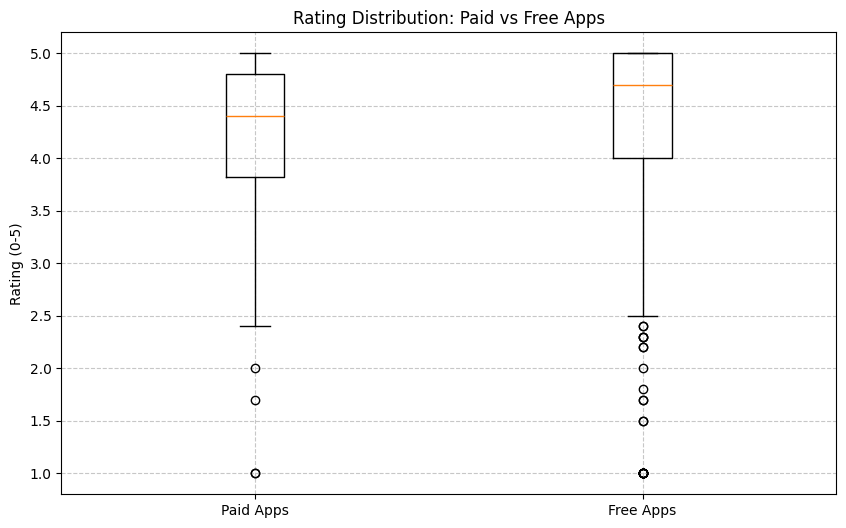

In [36]:
# Listas para almacenar los ratings
paid_ratings = []
free_ratings = []

# Recolectamos los ratings separando apps pagas y gratuitas
for row in data:
    if len(row) > 6:  # Aseguramos que la fila tenga suficientes columnas
        try:
            if row[2] != '' and row[2] != 'NaN':  # Verificamos que haya un rating válido
                rating = float(row[2])  # Convertimos el rating a float
                if 0 <= rating <= 5:  # Verificamos que el rating esté en el rango válido
                    if row[6] == 'Paid':
                        paid_ratings.append(rating)
                    elif row[6] == 'Free':
                        free_ratings.append(rating)
        except ValueError:
            continue  # Ignoramos filas con datos inválidos

# Calcular promedios
avg_paid_rating = sum(paid_ratings) / len(paid_ratings)
avg_free_rating = sum(free_ratings) / len(free_ratings)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(['Paid Apps', 'Free Apps'], [avg_paid_rating, avg_free_rating], 
        color=['#ff9999', '#66b3ff'])
plt.title('Average Rating: Paid vs Free Apps')
plt.ylabel('Average Rating (0-5)')
plt.ylim(0, 5)  # Establecemos el límite del eje y de 0 a 5
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar los valores exactos sobre las barras
for i, v in enumerate([avg_paid_rating, avg_free_rating]):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

# Imprimir estadísticas
print(f"\nEstadísticas de Ratings:")
print(f"Apps Pagas:")
print(f"- Rating promedio: {avg_paid_rating:.2f}")
print(f"- Número de apps pagas con rating: {len(paid_ratings):,}")
print(f"- Rating máximo: {max(paid_ratings):.2f}")
print(f"- Rating mínimo: {min(paid_ratings):.2f}")

print(f"\nApps Gratuitas:")
print(f"- Rating promedio: {avg_free_rating:.2f}")
print(f"- Número de apps gratuitas con rating: {len(free_ratings):,}")
print(f"- Rating máximo: {max(free_ratings):.2f}")
print(f"- Rating mínimo: {min(free_ratings):.2f}")

plt.show()

# Agregar un boxplot para mostrar la distribución completa
plt.figure(figsize=(10, 6))
plt.boxplot([paid_ratings, free_ratings], labels=['Paid Apps', 'Free Apps'])
plt.title('Rating Distribution: Paid vs Free Apps')
plt.ylabel('Rating (0-5)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Estadísticas de Instalaciones (en miles):
Apps Pagas:
- Total de instalaciones: 29.7
- Promedio de instalaciones por app: 0.1
- Número de apps pagas: 274
- Máximo de instalaciones: 0.5
- Mínimo de instalaciones: 0.0

Apps Gratuitas:
- Total de instalaciones: 217.3
- Promedio de instalaciones por app: 0.1
- Número de apps gratuitas: 1,508
- Máximo de instalaciones: 0.5
- Mínimo de instalaciones: 0.0


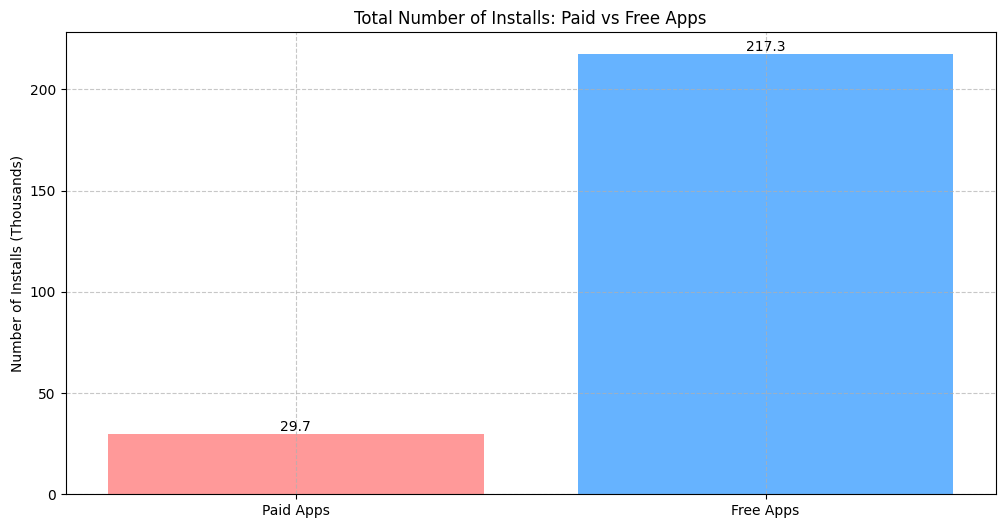

In [37]:
# Función para convertir el string de instalaciones a número (en miles)
def clean_installs(install_str):
    return int(install_str.replace(',', '').replace('+', '')) / 1000

# Listas para almacenar las instalaciones
paid_installs = []
free_installs = []

# Recolectamos las instalaciones separando apps pagas y gratuitas
for row in data:
    if len(row) > 6:  # Aseguramos que la fila tenga suficientes columnas
        try:
            if row[5] != '' and row[5] != 'Varies with device':  # Verificamos que haya datos válidos
                installs = clean_installs(row[5])
                if row[6] == 'Paid':
                    paid_installs.append(installs)
                elif row[6] == 'Free':
                    free_installs.append(installs)
        except ValueError:
            continue  # Ignoramos filas con datos inválidos

# Calcular totales
total_paid_installs = sum(paid_installs)
total_free_installs = sum(free_installs)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(['Paid Apps', 'Free Apps'], 
        [total_paid_installs, total_free_installs],
        color=['#ff9999', '#66b3ff'])
plt.title('Total Number of Installs: Paid vs Free Apps')
plt.ylabel('Number of Installs (Thousands)')
  # Usamos escala logarítmica debido a la gran diferencia

# Agregar los valores exactos sobre las barras
def format_number(n):
    if n >= 1e6:
        return f'{n/1e6:.1f}M'
    if n >= 1e3:
        return f'{n/1e3:.1f}K'
    return f'{n:.1f}'

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             format_number(height),
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)

# Imprimir estadísticas
print(f"\nEstadísticas de Instalaciones (en miles):")
print(f"Apps Pagas:")
print(f"- Total de instalaciones: {format_number(total_paid_installs)}")
print(f"- Promedio de instalaciones por app: {format_number(total_paid_installs/len(paid_installs))}")
print(f"- Número de apps pagas: {len(paid_installs):,}")
print(f"- Máximo de instalaciones: {format_number(max(paid_installs))}")
print(f"- Mínimo de instalaciones: {format_number(min(paid_installs))}")

print(f"\nApps Gratuitas:")
print(f"- Total de instalaciones: {format_number(total_free_installs)}")
print(f"- Promedio de instalaciones por app: {format_number(total_free_installs/len(free_installs))}")
print(f"- Número de apps gratuitas: {len(free_installs):,}")
print(f"- Máximo de instalaciones: {format_number(max(free_installs))}")
print(f"- Mínimo de instalaciones: {format_number(min(free_installs))}")

plt.show()

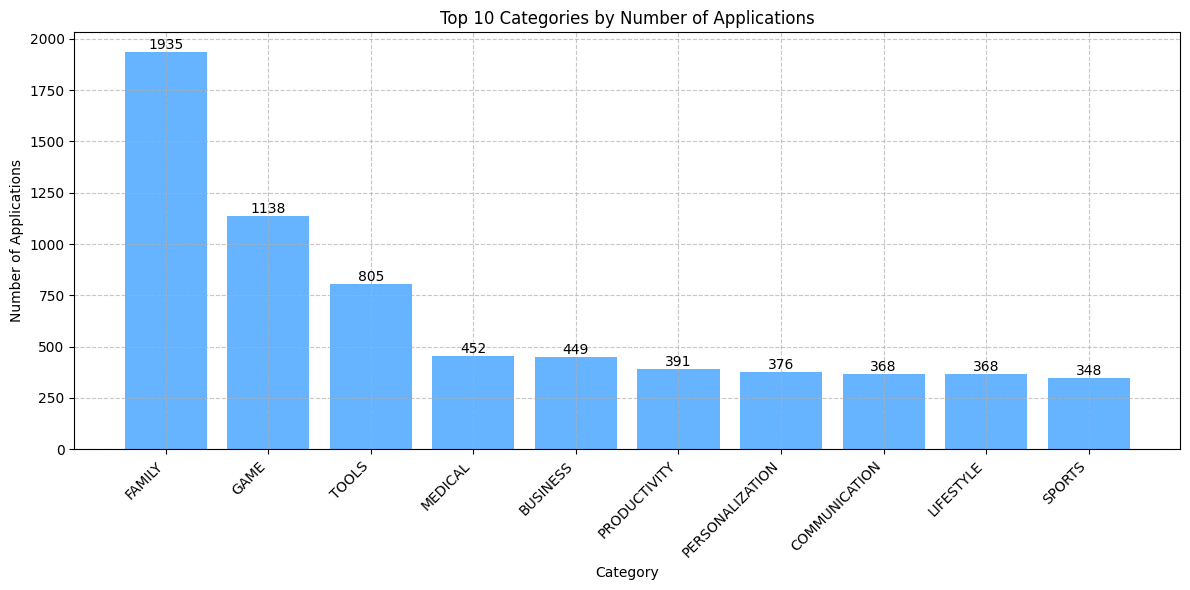


Top 10 Categorías con más aplicaciones:
1. FAMILY: 1935 aplicaciones (17.8% del total)
2. GAME: 1138 aplicaciones (10.5% del total)
3. TOOLS: 805 aplicaciones (7.4% del total)
4. MEDICAL: 452 aplicaciones (4.2% del total)
5. BUSINESS: 449 aplicaciones (4.1% del total)
6. PRODUCTIVITY: 391 aplicaciones (3.6% del total)
7. PERSONALIZATION: 376 aplicaciones (3.5% del total)
8. COMMUNICATION: 368 aplicaciones (3.4% del total)
9. LIFESTYLE: 368 aplicaciones (3.4% del total)
10. SPORTS: 348 aplicaciones (3.2% del total)

Estadísticas Generales:
Total de aplicaciones en todas las categorías: 10841
Total de aplicaciones en el Top 10: 6630
Porcentaje de aplicaciones en el Top 10: 61.2%


In [38]:
# Diccionario para contar apps por categoría
category_count = {}

# Contar apps por categoría
for row in data:
    if len(row) > 1:  # Nos aseguramos que la fila tenga suficientes columnas
        category = row[1]  # Índice 1 para categoría
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1

# Ordenar categorías por cantidad de apps (de mayor a menor)
sorted_categories = dict(sorted(category_count.items(), key=lambda x: x[1], reverse=True))

# Tomar solo el top 10
top_10_categories = dict(list(sorted_categories.items())[:10])

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_categories.keys(), top_10_categories.values(), color='#66b3ff')
plt.title('Top 10 Categories by Number of Applications')
plt.xlabel('Category')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Imprimir estadísticas
print("\nTop 10 Categorías con más aplicaciones:")
for i, (category, count) in enumerate(top_10_categories.items(), 1):
    percentage = (count / sum(category_count.values())) * 100
    print(f"{i}. {category}: {count} aplicaciones ({percentage:.1f}% del total)")

# Calcular estadísticas adicionales
total_apps = sum(category_count.values())
top_10_total = sum(top_10_categories.values())
top_10_percentage = (top_10_total / total_apps) * 100

print(f"\nEstadísticas Generales:")
print(f"Total de aplicaciones en todas las categorías: {total_apps}")
print(f"Total de aplicaciones en el Top 10: {top_10_total}")
print(f"Porcentaje de aplicaciones en el Top 10: {top_10_percentage:.1f}%")

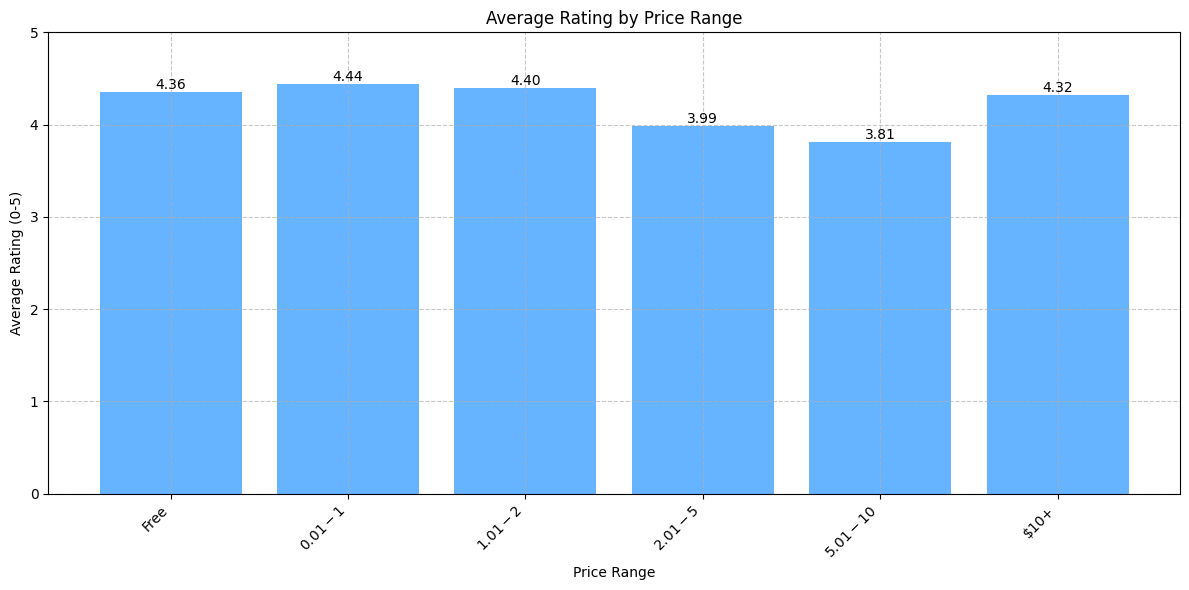

In [39]:
# Definir rangos de precios
price_ranges = {
    'Free': (0, 0),
    '$0.01 - $1': (0.01, 1),
    '$1.01 - $2': (1.01, 2),
    '$2.01 - $5': (2.01, 5),
    '$5.01 - $10': (5.01, 10),
    '$10+': (10.01, float('inf'))
}

# Diccionarios para almacenar datos
price_ratings = {range_name: [] for range_name in price_ranges}
price_counts = {range_name: 0 for range_name in price_ranges}

# Procesar datos
for row in data:
    try:
        if len(row) > 7:  # Asegurarse de que hay suficientes columnas
            price = float(row[7].replace('$', '')) if row[7] != '0' else 0
            rating = float(row[2]) if row[2] and row[2] != 'NaN' else None
            
            # Encontrar el rango de precio correspondiente
            for range_name, (min_price, max_price) in price_ranges.items():
                if min_price <= price <= max_price:
                    if rating is not None and 0 <= rating <= 5:
                        price_ratings[range_name].append(rating)
                    price_counts[range_name] += 1
                    break
    except ValueError:
        continue

# Calcular promedios y desviación estándar
price_stats = {}
for range_name in price_ranges:
    ratings = price_ratings[range_name]
    if ratings:
        avg_rating = sum(ratings) / len(ratings)
        price_stats[range_name] = {
            'avg_rating': avg_rating,
            'count': price_counts[range_name],
            'num_rated': len(ratings)
        }

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
ranges = list(price_stats.keys())
averages = [stats['avg_rating'] for stats in price_stats.values()]

bars = plt.bar(ranges, averages, color='#66b3ff')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating (0-5)')
plt.ylim(0, 5)  # Establecer límite del eje y de 0 a 5
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



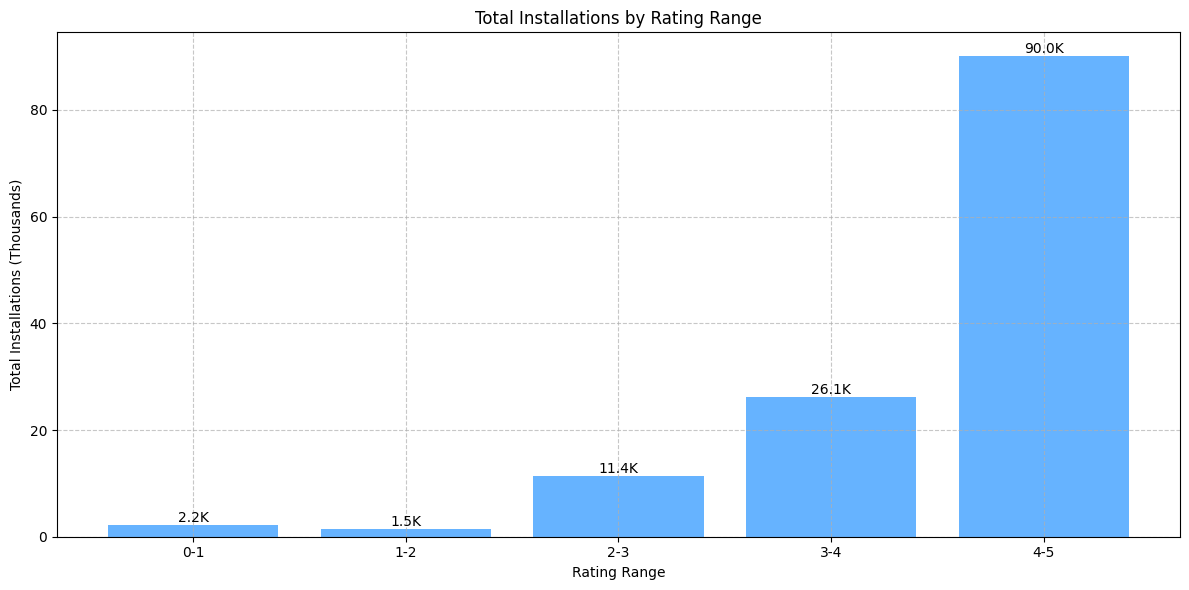


Estadísticas por Rango de Rating:

Rango de Rating | Total Instalaciones | Número de Apps | Promedio Instalaciones
---------------------------------------------------------------------------
0-1           |               2.2K |            16 |                  0.1K
1-2           |               1.5K |            53 |                  0.0K
2-3           |              11.4K |           301 |                  0.0K
3-4           |              26.1K |          2135 |                  0.0K
4-5           |              90.0K |          6309 |                  0.0K

Estadísticas Generales:
Total de aplicaciones analizadas: 8814
Total de instalaciones: 131.2K

Tendencias:
Rango de rating con más instalaciones totales: 4-5 (90.0K)
Rango de rating con menos instalaciones totales: 1-2 (1.5K)
Ratio entre mejor y peor rango: 61.9x


In [40]:


# Definir rangos de rating
rating_ranges = {
    '0-1': (0, 1),
    '1-2': (1, 2),
    '2-3': (2, 3),
    '3-4': (3, 4),
    '4-5': (4, 5)
}

# Función para limpiar y convertir instalaciones
def clean_installs(install_str):
    try:
        return int(install_str.replace(',', '').replace('+', ''))
    except ValueError:
        return 0

# Diccionario para almacenar datos
rating_stats = {range_name: {'total_installs': 0, 'app_count': 0} 
                for range_name in rating_ranges}

# Procesar datos
for row in data:
    try:
        if len(row) > 5 and row[2] and row[2] != 'NaN':  # Rating en índice 2
            rating = float(row[2])
            installs = clean_installs(row[5])  # Instalaciones en índice 5
            
            # Encontrar el rango de rating correspondiente
            for range_name, (min_rating, max_rating) in rating_ranges.items():
                if min_rating <= rating <= max_rating:
                    rating_stats[range_name]['total_installs'] += installs
                    rating_stats[range_name]['app_count'] += 1
                    break
    except ValueError:
        continue

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
ranges = list(rating_stats.keys())
total_installs = [stats['total_installs']/1000 for stats in rating_stats.values()]  # Convertir a miles

bars = plt.bar(ranges, total_installs, color='#66b3ff')
plt.title('Total Installations by Rating Range')
plt.xlabel('Rating Range')
plt.ylabel('Total Installations (Thousands)')
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}K', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Imprimir estadísticas detalladas
print("\nEstadísticas por Rango de Rating:")
print("\nRango de Rating | Total Instalaciones | Número de Apps | Promedio Instalaciones")
print("-" * 75)

for range_name, stats in rating_stats.items():
    total_inst = stats['total_installs']
    avg_inst = total_inst / stats['app_count'] if stats['app_count'] > 0 else 0
    print(f"{range_name:13} | {total_inst/1000:17.1f}K | {stats['app_count']:13d} | {avg_inst/1000:20.1f}K")

# Calcular estadísticas generales
total_apps = sum(stats['app_count'] for stats in rating_stats.values())
total_all_installs = sum(stats['total_installs'] for stats in rating_stats.values())

print(f"\nEstadísticas Generales:")
print(f"Total de aplicaciones analizadas: {total_apps}")
print(f"Total de instalaciones: {total_all_installs/1000:.1f}K")

# Identificar tendencias
max_range = max(rating_stats.items(), key=lambda x: x[1]['total_installs'])
min_range = min(rating_stats.items(), key=lambda x: x[1]['total_installs'])

print(f"\nTendencias:")
print(f"Rango de rating con más instalaciones totales: {max_range[0]} ({max_range[1]['total_installs']/1000:.1f}K)")
print(f"Rango de rating con menos instalaciones totales: {min_range[0]} ({min_range[1]['total_installs']/1000:.1f}K)")

# Calcular ratio entre mejor y peor rango
ratio = max_range[1]['total_installs'] / min_range[1]['total_installs'] if min_range[1]['total_installs'] > 0 else 0
print(f"Ratio entre mejor y peor rango: {ratio:.1f}x")

TypeError: text() missing 1 required positional argument: 's'

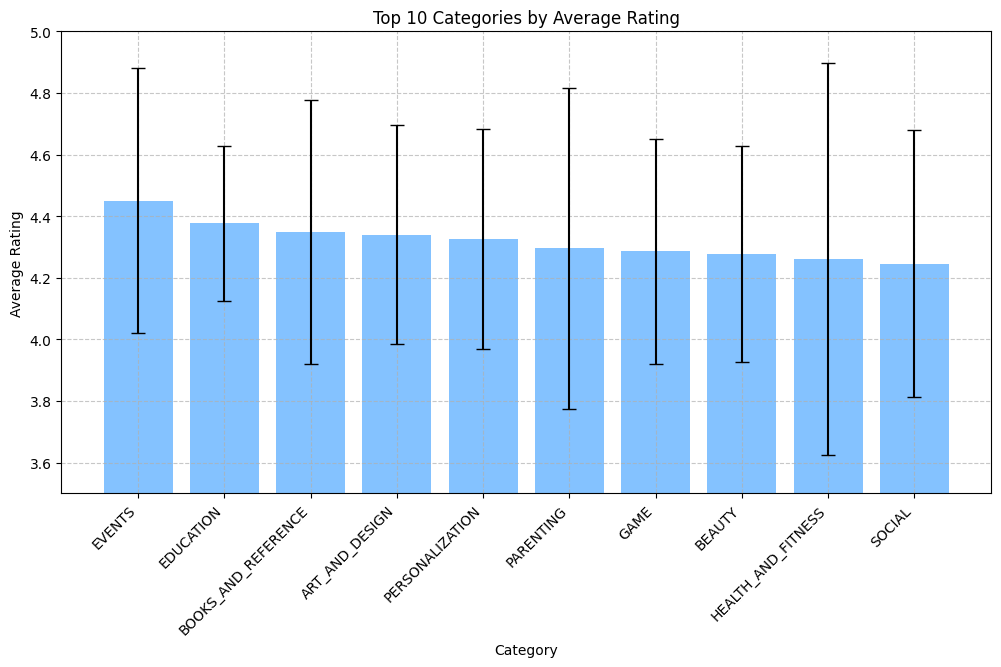

In [46]:
# Diccionarios para almacenar datos
category_ratings = {}
category_installs = {}
category_counts = {}

# Función para limpiar instalaciones
def clean_installs(install_str):
    try:
        return int(install_str.replace(',', '').replace('+', ''))
    except ValueError:
        return 0

# Recolectar datos
for row in data:
    try:
        if len(row) > 5:  # Asegurarse de que hay suficientes columnas
            category = row[1]  # Categoría
            rating = float(row[2]) if row[2] and row[2] != 'NaN' else None
            installs = clean_installs(row[5])
            
            if rating is not None and 0 <= rating <= 5:
                if category not in category_ratings:
                    category_ratings[category] = []
                    category_installs[category] = []
                    category_counts[category] = 0
                
                category_ratings[category].append(rating)
                category_installs[category].append(installs)
                category_counts[category] += 1
    except ValueError:
        continue

# Calcular estadísticas
category_stats = {}
for category in category_ratings:
    if len(category_ratings[category]) >= 10:  # Mínimo 10 apps con rating
        avg_rating = np.mean(category_ratings[category])
        avg_installs = np.mean(category_installs[category])
        total_installs = sum(category_installs[category])
        std_dev = np.std(category_ratings[category])
        
        category_stats[category] = {
            'avg_rating': avg_rating,
            'avg_installs': avg_installs,
            'total_installs': total_installs,
            'std_dev': std_dev,
            'count': len(category_ratings[category])
        }

# Obtener top 10 categorías por rating promedio
top_10_categories = dict(sorted(category_stats.items(), 
                              key=lambda x: x[1]['avg_rating'], 
                              reverse=True)[:10])

# Preparar datos para el gráfico
categories = list(top_10_categories.keys())
averages = [stats['avg_rating'] for stats in top_10_categories.values()]
std_devs = [stats['std_dev'] for stats in top_10_categories.values()]
installs = [stats['avg_installs']/1000000 for stats in top_10_categories.values()]

# Crear gráfico de barras con barras de error
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, averages, yerr=std_devs, capsize=5,
               color='#66b3ff', alpha=0.8)

# Personalizar gráfico
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(3.5, 5)  # Ajustar escala para mejor visualización

# Agregar valores sobre las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}\n({installs[i]:.1f}M)', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Imprimir estadísticas detalladas
print("\nTop 10 Categorías por Rating Promedio:")
print("\nCategoría | Rating Promedio | Desv. Est. | # Apps | Inst. Promedio (M) | Total Inst. (M)")
print("-" * 85)

for category, stats in top_10_categories.items():
    print(f"{category:15} | {stats['avg_rating']:14.2f} | {stats['std_dev']:9.2f} | {stats['count']:6d} | {stats['avg_installs']/1000000:16.1f} | {stats['total_installs']/1000000:13.1f}")

# Calcular estadísticas adicionales
print("\nEstadísticas del Top 10:")
top_10_apps = sum(stats['count'] for stats in top_10_categories.values())
total_apps = sum(stats['count'] for stats in category_stats.values())
top_10_installs = sum(stats['total_installs'] for stats in top_10_categories.values())
total_installs = sum(stats['total_installs'] for stats in category_stats.values())

print(f"Porcentaje de apps en el Top 10: {(top_10_apps/total_apps)*100:.1f}%")
print(f"Porcentaje de instalaciones en el Top 10: {(top_10_installs/total_installs)*100:.1f}%")

# Análisis de correlación para el Top 10
ratings = [stats['avg_rating'] for stats in top_10_categories.values()]
installs_list = [stats['avg_installs'] for stats in top_10_categories.values()]
correlation = np.corrcoef(ratings, installs_list)[0,1]

print(f"\nCorrelación entre rating e instalaciones en el Top 10: {correlation:.3f}")

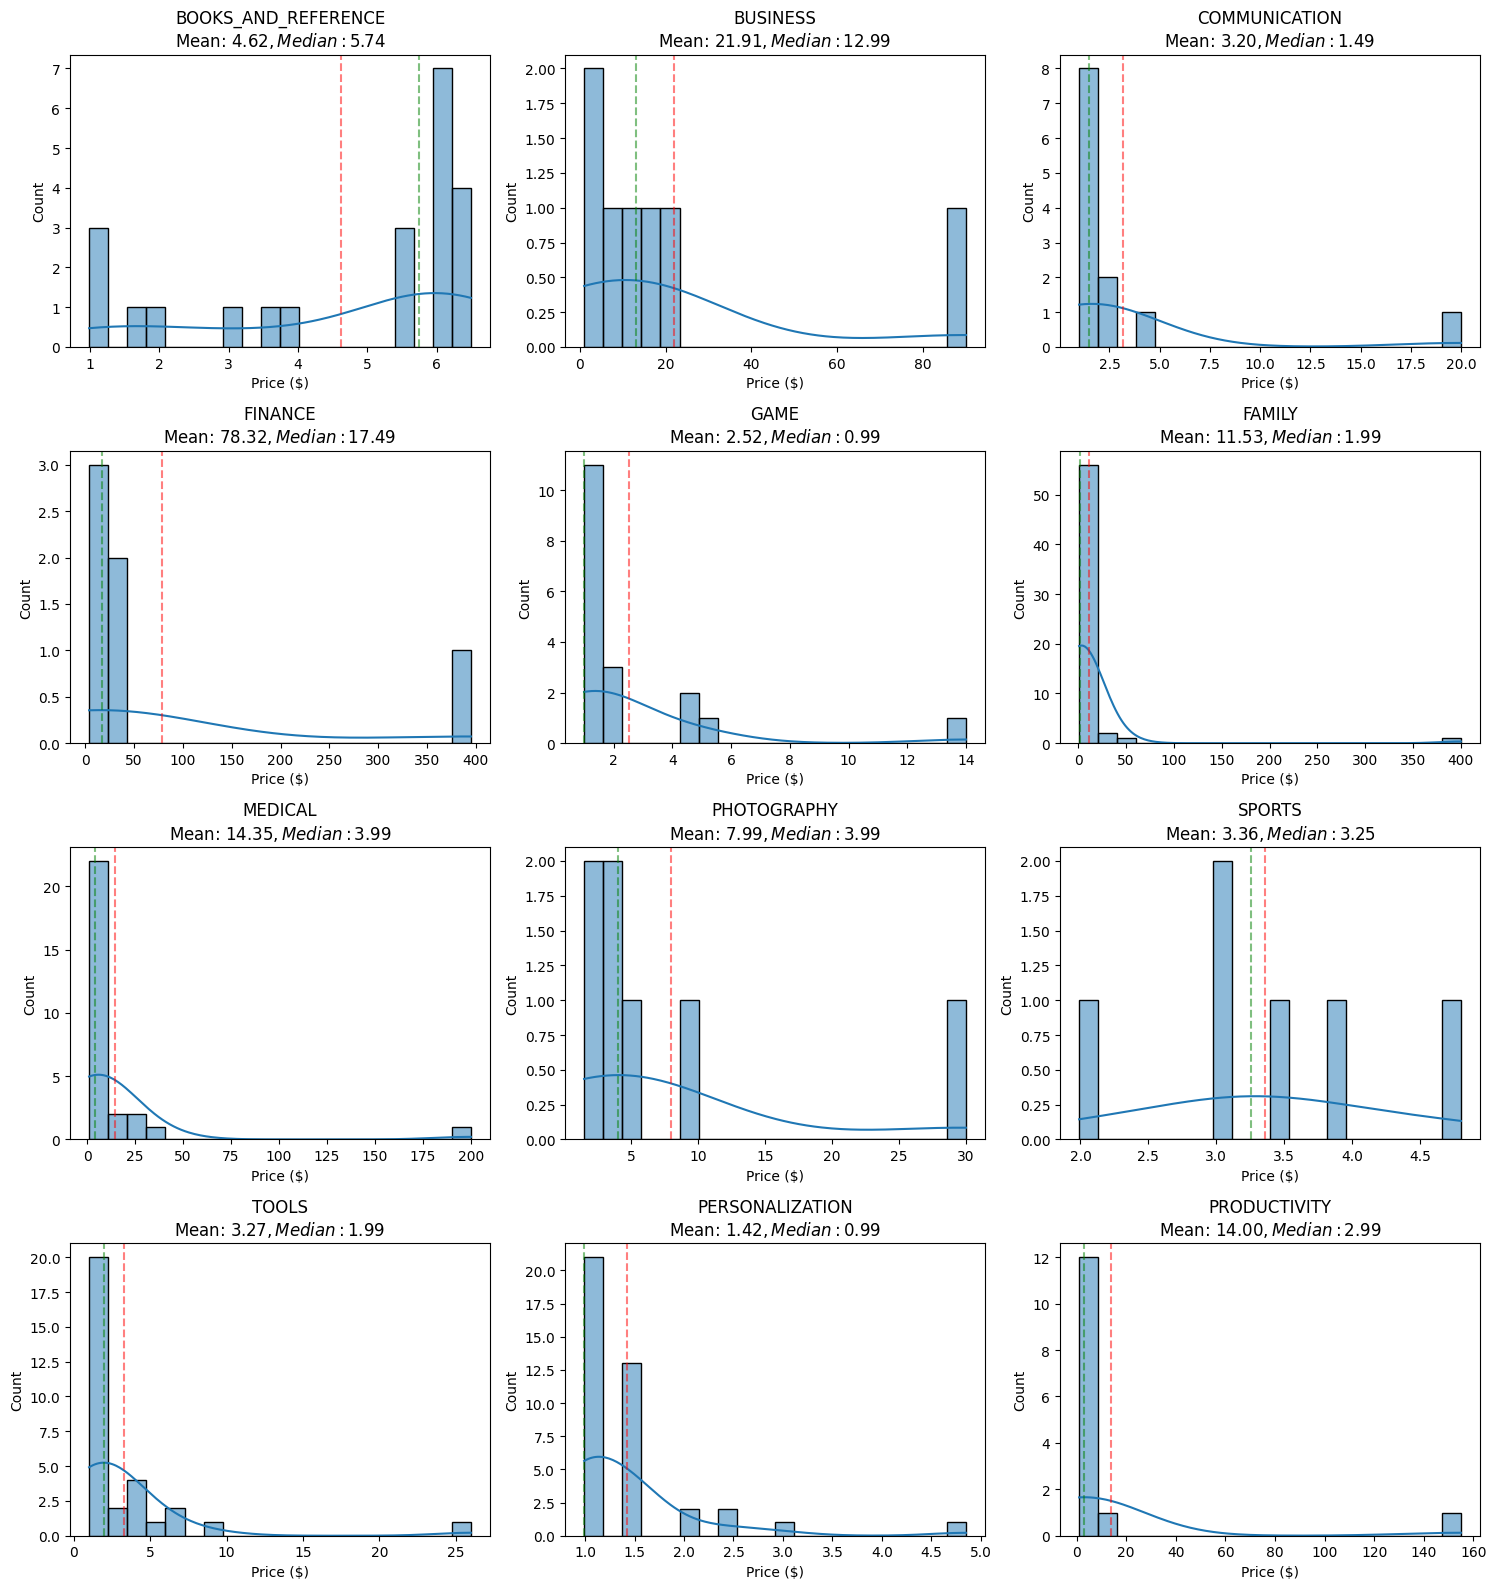


Estadísticas de Precios por Categoría:

Categoría | Apps Totales | Apps Pagas | % Pagas | Precio Medio | Precio Mediano | Precio Máx
-----------------------------------------------------------------------------------------------
BOOKS_AND_REFERENCE |         224 |        22 |    9.8% | $      4.62 | $        5.74 | $    6.49
BUSINESS        |         449 |         7 |    1.6% | $     21.91 | $       12.99 | $   89.99
COMMUNICATION   |         368 |        12 |    3.3% | $      3.20 | $        1.49 | $   19.99
FINANCE         |         344 |         6 |    1.7% | $     78.32 | $       17.49 | $  394.99
GAME            |        1138 |        18 |    1.6% | $      2.52 | $        0.99 | $   14.00
FAMILY          |        1935 |        60 |    3.1% | $     11.53 | $        1.99 | $  399.99
MEDICAL         |         452 |        28 |    6.2% | $     14.35 | $        3.99 | $  200.00
PHOTOGRAPHY     |         300 |         7 |    2.3% | $      7.99 | $        3.99 | $   29.99
SPORTS        

In [49]:
import seaborn as sns

# Diccionario para almacenar precios por categoría
category_prices = {}

# Función para limpiar precios
def clean_price(price_str):
    try:
        return float(price_str.replace('$', '').strip())
    except ValueError:
        return 0.0

# Recolectar datos
for row in data:
    try:
        if len(row) > 7:  # Asegurarse de que hay suficientes columnas
            category = row[1].strip()  # Categoría
            price = clean_price(row[7])  # Precio
            
            if category not in category_prices:
                category_prices[category] = []
            category_prices[category].append(price)
    except:
        continue

# Filtrar categorías con suficientes apps de pago
min_paid_apps = 5  # Mínimo de apps de pago para incluir la categoría
filtered_categories = {
    cat: prices for cat, prices in category_prices.items()
    if len([p for p in prices if p > 0]) >= min_paid_apps
}

# Crear subplots para las categorías
n_categories = len(filtered_categories)
n_cols = 3
n_rows = (n_categories + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for idx, (category, prices) in enumerate(filtered_categories.items(), 1):
    # Crear subplot
    plt.subplot(n_rows, n_cols, idx)
    
    # Crear density plot
    paid_prices = [p for p in prices if p > 0]
    if paid_prices:
        sns.histplot(paid_prices, kde=True, bins=20)
        
        # Añadir estadísticas
        mean_price = np.mean(paid_prices)
        median_price = np.median(paid_prices)
        
        plt.axvline(mean_price, color='r', linestyle='--', alpha=0.5)
        plt.axvline(median_price, color='g', linestyle='--', alpha=0.5)
        
        # Personalizar subplot
        plt.title(f'{category}\nMean: ${mean_price:.2f}, Median: ${median_price:.2f}')
        plt.xlabel('Price ($)')
        plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Imprimir estadísticas detalladas
print("\nEstadísticas de Precios por Categoría:")
print("\nCategoría | Apps Totales | Apps Pagas | % Pagas | Precio Medio | Precio Mediano | Precio Máx")
print("-" * 95)

for category, prices in filtered_categories.items():
    paid_prices = [p for p in prices if p > 0]
    if paid_prices:
        total_apps = len(prices)
        paid_apps = len(paid_prices)
        paid_percentage = (paid_apps / total_apps) * 100
        mean_price = np.mean(paid_prices)
        median_price = np.median(paid_prices)
        max_price = max(paid_prices)
        
        print(f"{category:15} | {total_apps:11d} | {paid_apps:9d} | {paid_percentage:6.1f}% | ${mean_price:10.2f} | ${median_price:12.2f} | ${max_price:8.2f}")

# Análisis adicional
all_paid_prices = []
for prices in filtered_categories.values():
    all_paid_prices.extend([p for p in prices if p > 0])

print("\nEstadísticas Generales de Precios:")
print(f"Precio promedio general: ${np.mean(all_paid_prices):.2f}")
print(f"Precio mediano general: ${np.median(all_paid_prices):.2f}")
print(f"Precio máximo general: ${max(all_paid_prices):.2f}")
print(f"Precio mínimo general: ${min(all_paid_prices):.2f}")

# Análisis de rangos de precios
price_ranges = {
    '0-1': 0,
    '1-5': 0,
    '5-10': 0,
    '10+': 0
}

for price in all_paid_prices:
    if price <= 1:
        price_ranges['0-1'] += 1
    elif price <= 5:
        price_ranges['1-5'] += 1
    elif price <= 10:
        price_ranges['5-10'] += 1
    else:
        price_ranges['10+'] += 1

print("\nDistribución por Rangos de Precios:")
total_paid = len(all_paid_prices)
for range_name, count in price_ranges.items():
    percentage = (count / total_paid) * 100
    print(f"${range_name}: {count} apps ({percentage:.1f}%)")

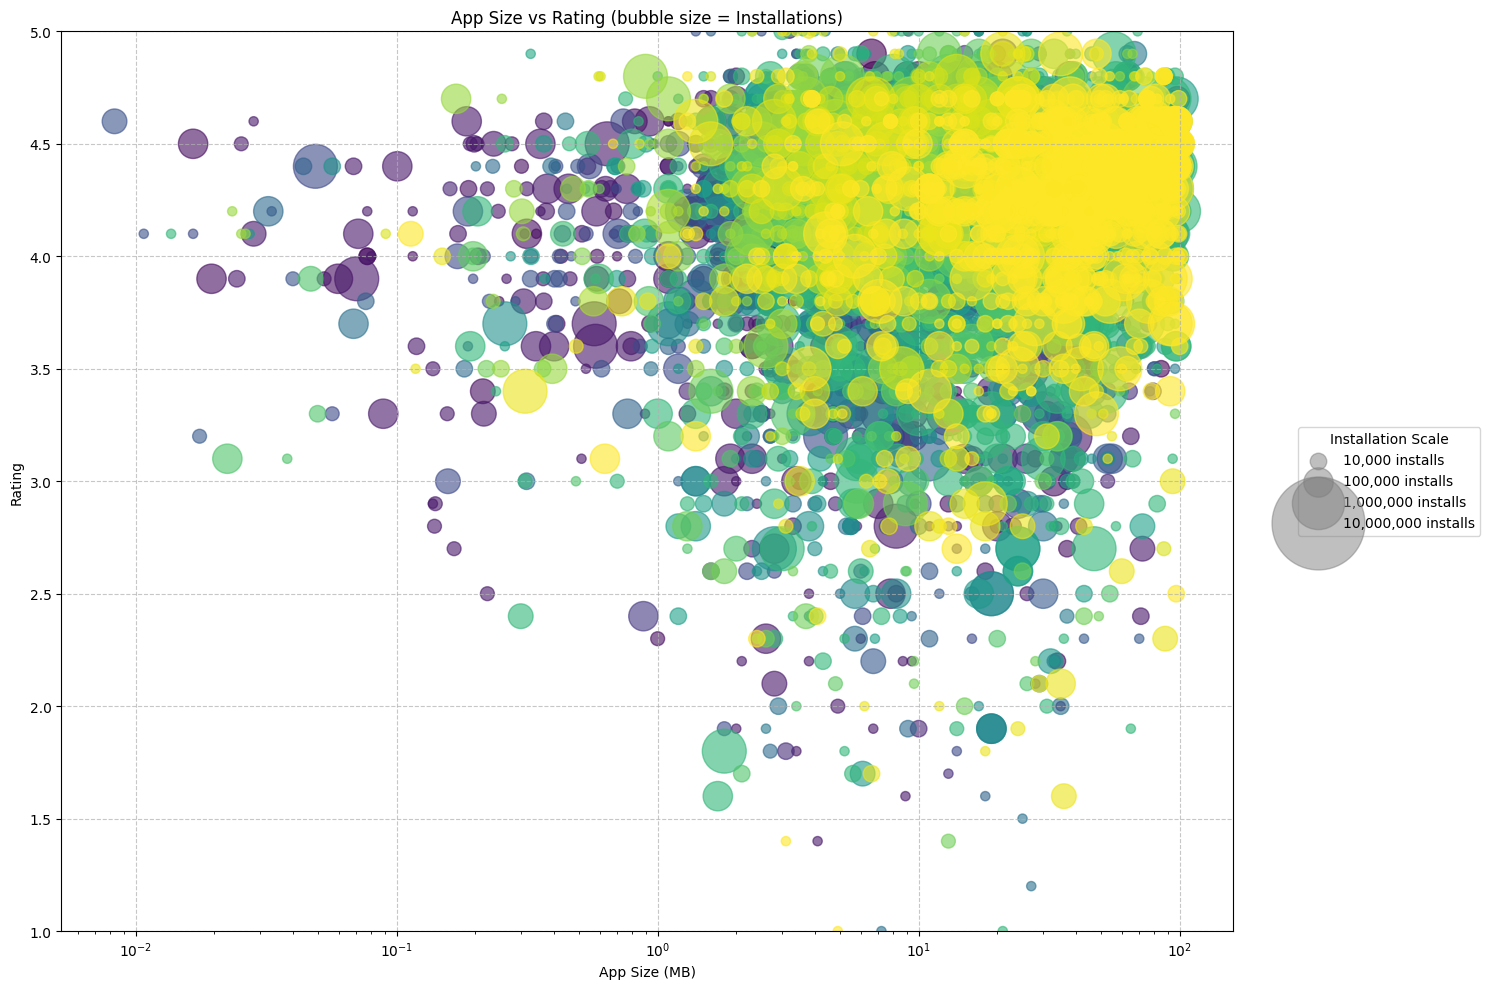


Estadísticas Generales:
Total de apps analizadas: 6734

Estadísticas de Tamaño (MB):
Promedio: 23.93
Mediana: 15.00
Mínimo: 0.01
Máximo: 100.00

Estadísticas de Rating:
Promedio: 4.15
Mediana: 4.30

Estadísticas de Instalaciones:
Promedio: 61,782
Mediana: 10,000

Correlaciones:
Tamaño vs Rating: 0.114
Tamaño vs Instalaciones (log): 0.045
Rating vs Instalaciones (log): -0.000

Estadísticas por Categoría:

Categoría | Apps | Tamaño Medio | Rating Medio | Inst. Medio (M)
----------------------------------------------------------------------
PARENTING       |   41 |       21.81 |       4.33 |           0.0
COMMUNICATION   |  174 |       12.67 |       4.08 |           0.1
TOOLS           |  547 |        8.25 |       3.99 |           0.1
MAPS_AND_NAVIGATION |   85 |       18.00 |       3.98 |           0.0
FOOD_AND_DRINK  |   79 |       23.91 |       4.06 |           0.1
SPORTS          |  216 |       26.74 |       4.20 |           0.1
HOUSE_AND_HOME  |   47 |       17.83 |       4.14 |    

In [50]:
import matplotlib.pyplot as plt
import numpy as np

file_path = './Play Store Data.csv'
all_data = []

# Reading all lines in the file
with open(file_path, 'r') as file:
    for line in file:
        all_data.append(line.strip().split(','))

headers = all_data[0]
data = all_data[1:]

# Funciones de limpieza
def clean_size(size_str):
    try:
        if 'Varies with device' in size_str:
            return None
        size = float(size_str.replace('M', '').replace('k', '').strip())
        if 'k' in size_str:
            size = size / 1024  # Convertir KB a MB
        return size
    except ValueError:
        return None

def clean_installs(install_str):
    try:
        if isinstance(install_str, list):
            install_str = ''.join(install_str)
        return int(install_str.replace('"', '').replace(',', '').replace('+', '').strip())
    except ValueError:
        return 0

# Listas para almacenar datos
sizes = []
ratings = []
installs = []
categories = []

# Recolectar datos
for row in data:
    try:
        if len(row) > 7:
            rating = float(row[2]) if row[2] and row[2] != 'NaN' else None
            size = clean_size(row[4])  # Tamaño en MB
            installs_count = clean_installs(row[5:7])  # Instalaciones
            category = row[1].strip()
            
            if rating is not None and size is not None and installs_count > 0:
                sizes.append(size)
                ratings.append(rating)
                installs.append(installs_count)
                categories.append(category)
    except:
        continue

# Crear el bubble chart
plt.figure(figsize=(15, 10))

# Normalizar el tamaño de las burbujas
installs_normalized = np.sqrt(installs) / np.sqrt(max(installs)) * 1000

# Crear scatter plot con tamaños variables y colores por categoría
unique_categories = list(set(categories))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))
color_dict = dict(zip(unique_categories, colors))

# Crear el scatter plot
for cat in unique_categories:
    mask = [c == cat for c in categories]
    plt.scatter(
        [sizes[i] for i in range(len(sizes)) if mask[i]],
        [ratings[i] for i in range(len(ratings)) if mask[i]],
        s=[installs_normalized[i] for i in range(len(installs_normalized)) if mask[i]],
        alpha=0.6,
        label=cat,
        color=color_dict[cat]
    )

plt.title('App Size vs Rating (bubble size = Installations)')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar límites y escala
plt.ylim(1, 5)
plt.xscale('log')  # Escala logarítmica para el tamaño

# Crear leyenda para el tamaño de las burbujas
legend_elements = [
    plt.scatter([], [], s=np.sqrt(size)/np.sqrt(max(installs)) * 1000, 
                c='gray', alpha=0.5, label=f'{size:,} installs')
    for size in [10000, 100000, 1000000, 10000000]
]

# Crear dos leyendas: una para categorías y otra para tamaños
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(handles=legend_elements, title='Installation Scale',
          bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

# Imprimir estadísticas
print("\nEstadísticas Generales:")
print(f"Total de apps analizadas: {len(sizes)}")

print("\nEstadísticas de Tamaño (MB):")
print(f"Promedio: {np.mean(sizes):.2f}")
print(f"Mediana: {np.median(sizes):.2f}")
print(f"Mínimo: {min(sizes):.2f}")
print(f"Máximo: {max(sizes):.2f}")

print("\nEstadísticas de Rating:")
print(f"Promedio: {np.mean(ratings):.2f}")
print(f"Mediana: {np.median(ratings):.2f}")

print("\nEstadísticas de Instalaciones:")
print(f"Promedio: {np.mean(installs):,.0f}")
print(f"Mediana: {np.median(installs):,.0f}")

# Análisis de correlación
corr_size_rating = np.corrcoef(sizes, ratings)[0,1]
corr_size_installs = np.corrcoef(sizes, np.log10(installs))[0,1]  # Log para mejor escala
corr_rating_installs = np.corrcoef(ratings, np.log10(installs))[0,1]

print("\nCorrelaciones:")
print(f"Tamaño vs Rating: {corr_size_rating:.3f}")
print(f"Tamaño vs Instalaciones (log): {corr_size_installs:.3f}")
print(f"Rating vs Instalaciones (log): {corr_rating_installs:.3f}")

# Análisis por categoría
print("\nEstadísticas por Categoría:")
print("\nCategoría | Apps | Tamaño Medio | Rating Medio | Inst. Medio (M)")
print("-" * 70)

for cat in unique_categories:
    mask = [c == cat for c in categories]
    cat_sizes = [sizes[i] for i in range(len(sizes)) if mask[i]]
    cat_ratings = [ratings[i] for i in range(len(ratings)) if mask[i]]
    cat_installs = [installs[i] for i in range(len(installs)) if mask[i]]
    
    print(f"{cat:15} | {len(cat_sizes):4d} | {np.mean(cat_sizes):11.2f} | {np.mean(cat_ratings):10.2f} | {np.mean(cat_installs)/1000000:13.1f}")

/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/740751864.py:93: UserWarning: Glyph 128044 (\N{DOLPHIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/740751864.py:93: UserWarning: Glyph 47716 (\N{HANGUL SYLLABLE MEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/740751864.py:93: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/740751864.py:93: UserWarning: Glyph 49901 (\N{HANGUL SYLLABLE SIB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/740751864.py:93: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tc/6x3nkx850hg19tt5cm5zbnhm0000gn/T/ipykernel_2146/740751864.py:

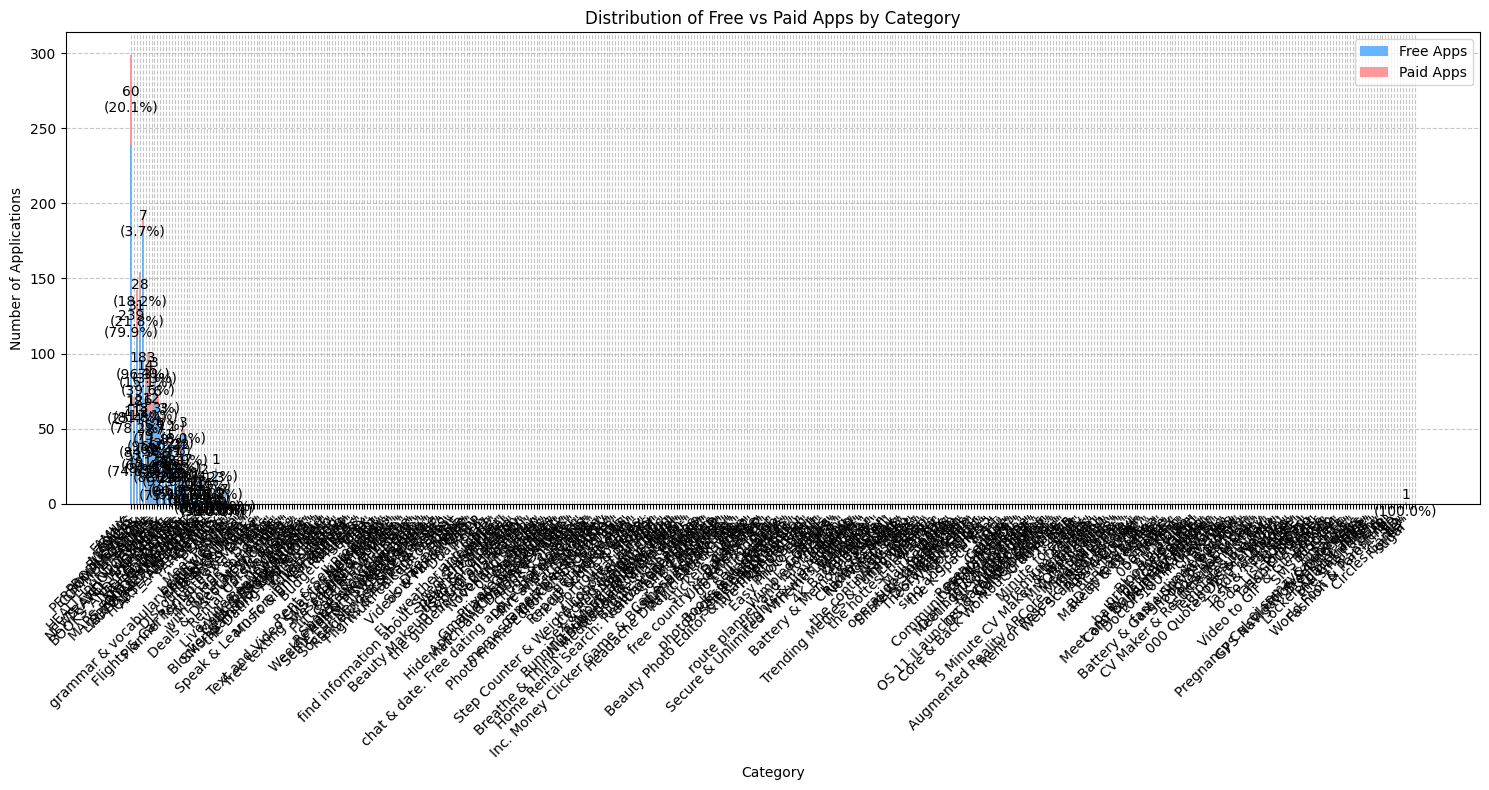


Estadísticas por Categoría:

Categoría | Total Apps | Apps Free | Apps Paid | % Free | % Paid
---------------------------------------------------------------------------
FAMILY          |       1935 |       239 |        60 |   12.4% |    3.1%
GAME            |       1138 |        53 |        18 |    4.7% |    1.6%
TOOLS           |        805 |       111 |        31 |   13.8% |    3.9%
MEDICAL         |        452 |       126 |        28 |   27.9% |    6.2%
BUSINESS        |        449 |       183 |         7 |   40.8% |    1.6%
PRODUCTIVITY    |        391 |        79 |        14 |   20.2% |    3.6%
PERSONALIZATION |        376 |        61 |        40 |   16.2% |   10.6%
COMMUNICATION   |        368 |        58 |        12 |   15.8% |    3.3%
LIFESTYLE       |        368 |        87 |         3 |   23.6% |    0.8%
SPORTS          |        348 |        66 |         6 |   19.0% |    1.7%
FINANCE         |        344 |        45 |         6 |   13.1% |    1.7%
HEALTH_AND_FITNESS |      

In [51]:
import matplotlib.pyplot as plt
import numpy as np

file_path = './Play Store Data.csv'
all_data = []

# Reading all lines in the file
with open(file_path, 'r') as file:
    for line in file:
        all_data.append(line.strip().split(','))

headers = all_data[0]
data = all_data[1:]

# Diccionarios para almacenar datos
category_free = {}
category_paid = {}
category_total = {}

# Recolectar datos
for row in data:
    try:
        if len(row) > 7:
            category = row[1].strip()  # Categoría
            price_type = row[6].strip()  # Tipo (Free/Paid)
            
            if category not in category_free:
                category_free[category] = 0
                category_paid[category] = 0
                category_total[category] = 0
            
            if price_type == 'Free':
                category_free[category] += 1
            elif price_type == 'Paid':
                category_paid[category] += 1
            category_total[category] += 1
            
    except:
        continue

# Obtener solo top 15 categorías por total de apps
top_15_categories = dict(sorted(category_total.items(), 
                              key=lambda x: x[1], 
                              reverse=True)[:15])

# Preparar datos para el gráfico
categories = list(top_15_categories.keys())
free_counts = [category_free[cat] for cat in categories]
paid_counts = [category_paid[cat] for cat in categories]

# Crear gráfico de barras apiladas
plt.figure(figsize=(15, 8))

# Crear barras
bars_free = plt.bar(categories, free_counts, label='Free Apps', color='#66b3ff')
bars_paid = plt.bar(categories, paid_counts, bottom=free_counts, 
                    label='Paid Apps', color='#ff9999')

# Personalizar gráfico
plt.title('Top 15 Categories - Distribution of Free vs Paid Apps')
plt.xlabel('Category')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar etiquetas con valores y porcentajes
for i, (free, paid) in enumerate(zip(free_counts, paid_counts)):
    total = free + paid
    # Etiqueta para apps gratuitas
    if free > 0:
        plt.text(i, free/2, 
                f'{free}\n({free/total*100:.1f}%)', 
                ha='center', va='center')
    # Etiqueta para apps de pago
    if paid > 0:
        plt.text(i, free + paid/2, 
                f'{paid}\n({paid/total*100:.1f}%)', 
                ha='center', va='center')

plt.tight_layout()
plt.show()

# Imprimir estadísticas del Top 15
print("\nEstadísticas del Top 15 Categorías:")
print("\nCategoría | Total Apps | Apps Free | Apps Paid | % Free | % Paid")
print("-" * 75)

for category in categories:
    total = category_total[category]
    free = category_free[category]
    paid = category_paid[category]
    free_percentage = (free / total) * 100
    paid_percentage = (paid / total) * 100
    
    print(f"{category:15} | {total:10d} | {free:9d} | {paid:9d} | {free_percentage:6.1f}% | {paid_percentage:6.1f}%")

# Estadísticas generales del Top 15
top_15_total = sum(category_total[cat] for cat in categories)
top_15_free = sum(category_free[cat] for cat in categories)
top_15_paid = sum(category_paid[cat] for cat in categories)

print("\nEstadísticas Generales del Top 15:")
print(f"Total de aplicaciones: {top_15_total}")
print(f"Aplicaciones gratuitas: {top_15_free} ({(top_15_free/top_15_total)*100:.1f}%)")
print(f"Aplicaciones de pago: {top_15_paid} ({(top_15_paid/top_15_total)*100:.1f}%)")

# Análisis adicional del Top 15
print("\nCategorías del Top 15 con mayor proporción de apps de pago:")
paid_proportions = [(cat, category_paid[cat]/category_total[cat]*100) 
                   for cat in categories]
top_paid = sorted(paid_proportions, key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 categorías con mayor % de apps de pago:")
for cat, percentage in top_paid:
    total = category_total[cat]
    paid = category_paid[cat]
    print(f"{cat}: {percentage:.1f}% ({paid} de {total} apps)")